# Síntesis de Señales

## Introducción

En este trabajo se generaron y graficaron distintos tipos de señales en tiempo discreto, se estudiaron sus características principales y la relación que existe entre ellas a través de temas como la ortogonalidad y correlación/autocorrelación.       

### Tipos de Señales

**Señal sinusoidal:**
    Una señal sinusoidal es una onda $2\pi$ periódica sintetizada por la función matemática del seno. Tiene una forma suave y continua, oscilando entre valores positivos y negativos de manera regular con una apmplitud fija. Esta señal puede ser amplificada al aumentar su amplitud y tambien desfasada en el eje x al sumar una fase en radianes dento de su argumento.

 Una señal senoidal tiene la forma siguiente:
$$X(t)=A.sen(\omega_0.t + \phi)$$

Siendo:
- A: La amplitud de la señal
- $\omega_0:$ La frecuencia de la señal en $rad/s$ ($2\pi.f_0$ para Hz)
- t: El tiempo
- $\phi:$ El desfase

**Señal modulada en amplitud:** La modulación consiste en variar algún parámetro (en este c aso, amplitud) de una señal portadora en función de otra señal llamada moduladora. En el caso de este TS, la amplitud de una senoidal de 2 kHz se hizo variar con otra senoidal de la mitad de su frecuencia. Esto es la base de la transmisión de información en radiofrecuencia.
Esto es muy usado en radios AM por ejemplo, se utiliza una señal portadora de alta frecuencia para poder transmitir una señal moduladora de baja frecuencia (como el audio) ya que las señales de alta frecuencia pueden propagarse más lejos que las de baja frecuencia.                               La señal moduladora como que se superpone a la portadora, esto hace que la amplitud de la señal portadora varíe de acuerdo a una envolvente que tiene la misma forma que la señal moduladora. 

Una señal modulada puede verse de la asiguiente forma:
$$m(t)=[1+k.x(t)].y(t)$$

Siendo:
- $k:$ El índice de modulación (qué tanto "pesa" la moduladora)
- x(t): La señal moduladora
- y(t): La señal portadora

**Señal recortada:** El recorte de una señal es una forma de distorsión donde la amplitud de esta se limita para bajar su potencia neta. Este proceso aparece en sistemas saturados y es útil para estudiar no linealidades.Un ejemplo comun puede ser cuando un amplificador no puede manejar voltajes más altos y la señal es cortada en su pico superior o inferior.

**Señal cuadrada:** Es una señal binaria periódica que alterna abruptamente (sin puntos suaves) entre dos niveles de voltaje. Tiene un *duty cicle* qu es la proporción del tiempo que la señal permanece en su nivel alto en relación con el período completo. La señal está compuesta por una onda sinusoidal fundamental a la misma frecuencia, junto con una serie infinita de armónicos impares (múltiplos impares de la frecuencia fundamental) con amplitudes decrecientes. 

Una señal cuadrada puede describirse de varias formas:

Por tramos:

$$
x(t) =
\begin{cases}
A, & 0 \leq t < \tfrac{T}{2} \\
- A, & \tfrac{T}{2} \leq t < T
\end{cases}
\quad \text{con periodo } T
$$
Siendo:
- A: La amplitud
- T: El periodo
- La frecuencia $f= \frac{1}{T}$ 

Utilizando la función "signo" del coseno: 
$$x(t) = A \cdot \operatorname{sgn}\!\big(\cos(2 \pi f t)\big)$$

Como suma de infinitas senoidales impares:
$$x(t) = \frac{4.A}{\pi} \sum_{k=1,3,5,\dots}^{\infty} 
\frac{1}{k} \, \sin(2 \pi k f t)$$
Esto muestra que la señal contiene una fundamental de frecuencia y armónicos imparesque le dan su forma cuadrada.

**Pulso rectangular:**
Es una señal que vale un nivel constante durante un tiempo finito y luego vuelve a cero. Se usa mucho para representar transmisiones digitales (bits) y para estudiar la respuesta de sistemas en tiempo y frecuencia.

Un pulso rectangular puede tener la siguiente forma:
$$x(t) =
\begin{cases}
A, & |t| < \tfrac{T}{2} \\
0, & |t| \geq \tfrac{T}{2}
\end{cases}$$

### Ortogonalidad

Dos señales son ortogonales si su producto interno (integral para continua o suma del producto para discreta) es cero, esto significa que no comparten información común.
$$\sum_{n=0}^{N-1} x[n]\,y[n] = 0$$
La ortogonalidad permite que un receptor identifique y recupere cada señal por separado, sin interferencia de las otras señales presentes en el mismo canal.                                                                                                                                                 Si dos señales son ortogonales indica que no están correlacionadas entre sí. (la correlacion se explica debajo)

### Correlación y Autocorrelación

La correlación mide el grado de similitud entre dos señales cuando una tiene un cierto desfase (retraso/adelanto) entre ellas. Si dos señales son muy parecidas, la correlación cruzada muestra un máximo alto y si sonnmuy distintas la correlacion da casi 0.
$$
R_{xy}[k] = \sum_{n=0}^{N-1} x[n]\,y[n+k]$$

- Con $k$ siendo el desfasaje

La autocorrelacion es cuando se hace la correlación con dos señales idénticas (es decir, consigo misma) pero una desplazada en el tiempo. Sirve para medir la periodicidad, si la señal es periódica, la autocorrelación va a mostrar picos repetidos en múltiplos de su período. Tambien sirve para medir la energía de la señal, El valor máximo de la autocorrelación siempre ocurre en $k=0$ y es igual a la energía total de la señal.
$$
R_{xx}[0] = \sum_{n=0}^{N-1} x[n]^2
$$
Esto se usa para medir potencia/energía en teoría de señales. Si hay correlacion ente dos señales, entonces estas no tienen producto interno nulo (no son ortogonales).

## Análisis y Desarrollo

### 1) Sintetizar y Graficar

**Sintetización y graficación de una señal sinusoidal de 2KHz y una igual pero amplificada y desfasada en $\frac{\pi}{2}$**

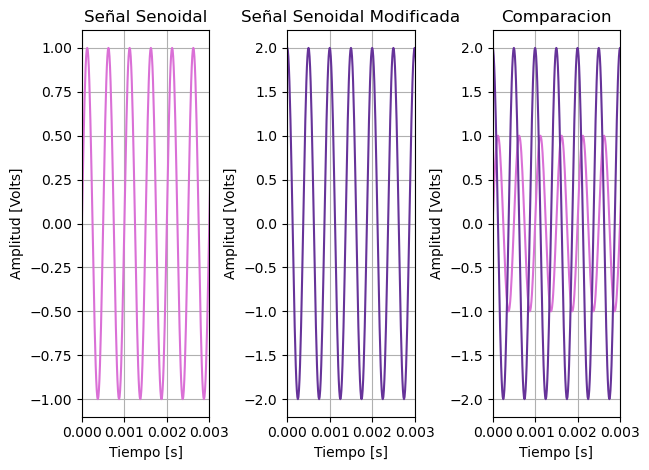

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    # vmax:amplitud max de la senoidal [Volts]
    # dc:valor medio [Volts]
    # ff:frecuencia [Hz]
    # ph:fase en [rad]
    # nn:cantidad de muestras
    # fs:frecuencia de muestreo [Hz]

    # período de muestre (osea cuanto tiempo hay entre muestra y muestra)
    Ts = 1/fs
    # tt seria el vector de tiempos donde se evalúa la señal
    tt = np.linspace(0, (nn-1)*Ts, nn)
    # np.linspace(start, stop, num, endpoint=True, retstep=False, dtype=None, axis=0)
    # np.pi es pi y np.sin es para hacer el seno
    xx = vmax*np.sin(2*np.pi*ff*tt+ph)+dc

    return tt, xx


N = 1000  # bajo las muestras para que se vea mejor la senoidal)
fs = 80000  # debo poner al menos el doble de la frecuencia que quiero esstudiar
# use 2kHz asi que al menos mi frec de muestreo deeria ser 4kHz pero puse 80k para darme mas margen
tt, xx = mi_funcion_sen(1, 0, 2000, 0, N, fs)
plt.figure(1)
plt.subplot(1, 3, 1)
plt.plot(tt, xx, color='orchid')
plt.title('Señal Senoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.xlim(0, 0.003)
plt.tight_layout()

#-----------SEÑAL AMPLIFICADA Y DESFASADA PI/2 (de amplitud 1 a 2)-----------#
tt1, xx1 = mi_funcion_sen(2, 0, 2000, np.pi/2, N, fs)
plt.subplot(1, 3, 2)
plt.plot(tt1, xx1, color='rebeccapurple')
plt.title('Señal Senoidal Modificada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.xlim(0, 0.003)
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(tt, xx, color='orchid')
plt.plot(tt1, xx1, color='rebeccapurple')
plt.title('Comparacion')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.xlim(0, 0.003)
plt.tight_layout()
plt.show()

La primera señal corresponde a una onda senoidal de $f=2kHz$ y amplitud $1V$. La frecuencia de muestreo utilizada es de $f_s=80kHz$ que es bastante mas alta a la frecuencia de Nyquist ($f_s>>2f$) así que me garantiza una correcta representación temporal sin aliasing. La segunda señal tiene la misma frecuencia pero esta amplificada, es decir, tiene una amplitud 6 veces mayor ($6V$), además está desfasada en $\frac{\pi}{2}$ radianes respecto a la primera. Este desfase equivale a un corrimiento temporal de un cuarto del período, entonces el desplazamiento de la onda es de: $\Delta t=\frac{T_{señal original}}{4}=125\mu$ Al comparar ambas señales se puede ver que al amplificar la señal, no solo crece la amplitud, sino que también se incrementa el contenido energético (la energía depende del cuadrado de la amplitud), y que el desfase causa una diferencia en la alineación temporal de ambas señales.
$$\frac{E_2}{E_1} = \left(\frac{6}{1}\right)^2 = 36$$
La segunda señal tiene 36 veces mas energía que la primera incluso si su duracíon y frecuencia es la misma.

**Señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia**

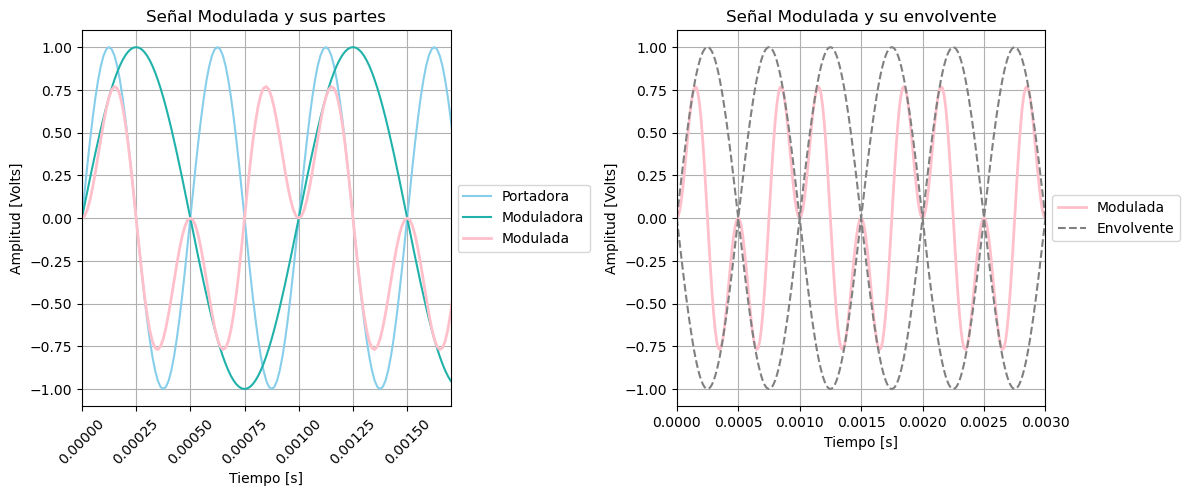

In [21]:
#-----------------SEÑAL MODULADA-----------------#
tt, xx = mi_funcion_sen(1, 0, 2000, 0, N, fs)
ttm, xxm = mi_funcion_sen(1, 0, 1000, 0, N, fs)
modulada = xx*xxm

plt.figure(2, figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(tt, xx, label='Portadora', color='skyblue')
plt.plot(ttm, xxm, label='Moduladora', color='lightseagreen')
plt.plot(ttm, modulada, label='Modulada', color='pink', linewidth=2)
plt.xticks(rotation=45)
plt.title('Señal Modulada y sus partes')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.xlim(0, 0.0017)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(1, 2, 2)
plt.plot(ttm, modulada, label='Modulada', color='pink', linewidth=2)
plt.plot(ttm, xxm, color='grey', linestyle='--', label='Envolvente')
plt.plot(ttm, -xxm, color='grey', linestyle='--')
plt.title('Señal Modulada y su envolvente')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.xlim(0, 0.003)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

La señal modulada en amplitud se obtuvo al multiplicar una señal senoidal portadora de $f_p=2kHz$ por una señal moduladora de $f_m=1kHz$, ambas de misma amplitud. Se puede ver en el gráfico que la señal modulada tiene una envolvente que sigue la forma de la moduladora y mantiene la frecuencia de la portadora, además la amplitud de la modulada va variando respecto a la de la moduladora, por eso la fase de mi modulada se invierte cuando la otra vale -1. Siguiendo la identidad trigonométrica demostrada en el punto 4) de este trabajo:
$$2.sen(\alpha).sen(\beta)=cos(\alpha-\beta)-cos(\alpha+\beta)$$
$$sen(2\pi f_pt).sen(2\pi f_mt)=\frac{1}{2}[cos(2\pi(f_p-f_m)t)-cos(2\pi(f_p+f_m)t)]$$
$$SeñalModulada=\frac{1}{2}.cos(2\pi(1kHz)t)-\frac{1}{2}.cos(2\pi(3kHz)t)$$
Entonces la amplitud máxima absoluta (teórica) de mi señal modulada es la suma de las amplitudes de ambos cosenos, aunque esta cuenta da 1V, los picos de las señales no coinciden por lo que nos da visualmente los un máximos aproximadamente en 0,75V.

Respecto a la energia de esta señal, se puede ver que la energía promedio de la modulada es menor, debido a que muchas muestras se ven como atenuadas por la moduladora al multiplicarlas, afectando la potencia promedio de la señal.

**Señal recortada al 75% de su amplitud**

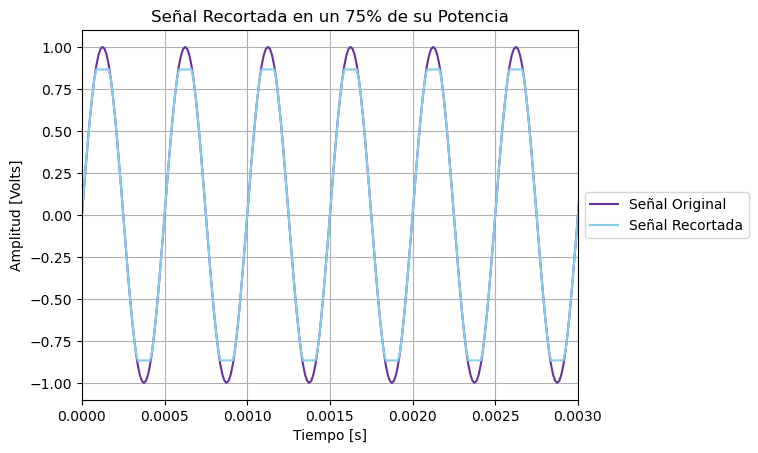

In [25]:
#-----------------SEÑAL RECORTADA-----------------#
ttR, xxR = mi_funcion_sen(1, 0, 2000, 0, N, fs)
potencia = np.mean(xxR**2)
pot75 = potencia*0.75
amplitudRecortada = np.sqrt(pot75*2)
senoidalRecortada = np.clip(xxR, -amplitudRecortada, amplitudRecortada)
plt.figure(3)
plt.plot(ttR, xxR, label='Señal Original', color='rebeccapurple')
plt.plot(ttR, senoidalRecortada,label='Señal Recortada', color='skyblue')
plt.title('Señal Recortada en un 75% de su Potencia')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.xlim(0, 0.003)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Para averiguar el valor de la amplitud a la que tenia que recortar mi señal original, primero se calculó la potencia promedio de la señal original como el valor medio del cuadrado de sus muestras: $$\text{potencia} = \frac{1}{N} \sum_{n=0}^{N-1} \left(x[n]\right)^2$$
Esto se realizo con una funcion de la librería numpy de python (mean(xxR**2)). 

A partir de dicha potencia se calculó su 75% y se utilizó la relacion que hay entre potencia y amplitud $P=\frac{A^2}{2}$ para calcular la amplitud a la que debiamos recortar nuestra señal. Finalmente con la funcion de numpy de python (clip) se limitó la amplitud máxima de mi señal a $[-A_{recortada};A_{recortada}]$. Se puede observar en la gráfica como los picos de la señal original fueron limitados o cortados al 75% de la amplitud, lo que reduce su energía total. Este metodo es bueno para poder ver los efectos de la saturación en algunos sistemas electronicos.

**Señal Cuadrada y Pulso Rectangular** 

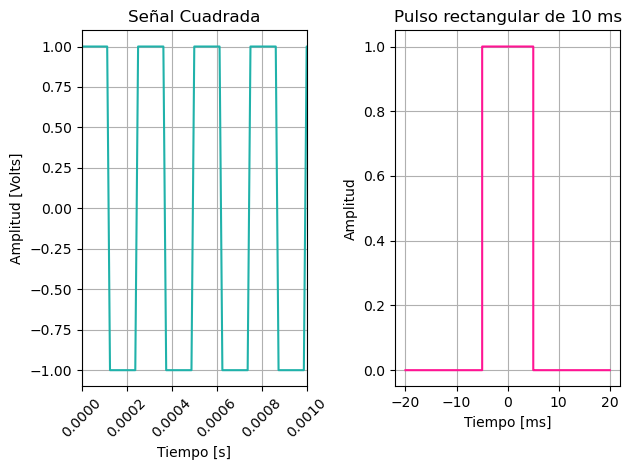

In [28]:
#-----------------SEÑAL CUADRADA-----------------#
TsC = 1/fs
ttC = np.linspace(0, (N-1)*TsC, N)
señalCuadrada = sig.square(2 * np.pi * 4000 * ttC)

plt.figure(4)
plt.subplot(1, 2, 1)
plt.plot(ttm, señalCuadrada, color='lightseagreen')
plt.title('Señal Cuadrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Volts]')
plt.grid(True)
plt.xlim(0, 0.0010)
plt.xticks(rotation=45)

plt.tight_layout()

#-----------------PULSO RECTANGULAR-----------------#
TsP = 0.01   # 10 ms
fsP = 80000   
#t = np.linspace(0, Ttotal, N, endpoint=False)
t = np.arange(-2*TsP, 2*TsP, 1/fsP)  # eje temporal de -20 ms a 20 ms
pulso = np.where((t >= -TsP/2) & (t <= TsP/2), 1, 0)#vale 1 entre -T/2 y T/2, 0 fuera

#--> True (1)
# --> False (0)

plt.subplot(1, 2, 2)
plt.plot(t*1000, pulso, drawstyle='steps-post',color='deeppink' ) 
#hice t*1000 para que este en ms
#drawstyle='steps-post' es para que se vea como un pulso y no un triangulo
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.title("Pulso rectangular de 10 ms")
plt.grid(True)

plt.tight_layout()
plt.show()

La primer señal es una onda cuadrada de 4kHz, esta alterna entre $\pm1V$ con un período de $T=\frac{1}{f}=0,25ms$, en este caso nuestro duty cycle es del 50%, es decir, pasa la mitad del período en su amplitud máxima y la otra mitad en su amplitud mínima. La potencia instantánea es constante, y la potencia promedio de la señal puede calcularse como el valor medio del cuadrado de las muestras: $$potenciaPromedio= \frac{1}{N} \sum_{n=0}^{N-1} \left(x[n]\right)^2$$ Siendo esta de $1V^2$ 


La segunda señal es un pulso rectangular de 10ms de duracion, lo centré en $t=0$ para que quede mas claro en el gráfico. La energía de este pulso se concentra totalmente desntro de este, por esto mismo, la energía del pulso es igual a la cantidad de muestras dentro de este (ya que mi amplitud es 1V). Para una señal discreta con N muestras la energia se calcula como:
$$Energía = \sum_{n=0}^{N-1} \left|x[n]\right|^2$$
Un pulso rectangular se puede repesentar de la siguiente manera:
$$x(t) =
\begin{cases}
A, & |t| < \tfrac{T}{2} \\
0, & |t| \geq \tfrac{T}{2}
\end{cases}$$

Y como mi señal es distinta de cero solo para la parte del pulso, la sumatoria solo vale para esa parte, por lo que mi energía queda como:
$$E=N_{pulso}.A^2$$ 
Siendo $N_{pulso}$ la cantidad de muestras hay dentro de mi pulso.

### 2) Verificación de ortogonalidad entre la primera señal y las demás

In [29]:
#-----------------ORTOGONALIDAD-----------------#
def verificarOrtogonalidad(x1, x2):

    L = min(len(x1), len(x2)) # Cuando hace producto interno necesitas tener la misma cant de puntos
    #Por si no tenes la misma cantidad de puntos, pones eso y toma la cant de puntos de la señal qie menos puntos tenga
    productoInterno = np.dot(x1[:L], x2[:L])
    return productoInterno


producto = verificarOrtogonalidad(xx, xx1)
print("Verificacion de ortogonalidad entre mi senoidal de 2KHz y la misma amplificada y desfasada: \n", round(producto, 3))
if abs(producto) < 1e-10: #porque no da 0 justo por alguna razon
    print("Las señales son ortogonales\n")
else:
    print("Las señales no son ortogonales\n")


producto = verificarOrtogonalidad(xx, modulada)
print("Verificacion de ortogonalidad entre mi senoidal de 2KHz y una modulada por una sinusoidal de la mitad de la frecuencia: \n", round(producto, 3))
if abs(producto) < 1e-10: #porque no da 0 justo por alguna razon
    print("Las señales son ortogonales\n")
else:
    print("Las señales no son ortogonales\n")


producto = verificarOrtogonalidad(xx, senoidalRecortada)
print("Verificacion de ortogonalidad entre mi senoidal de 2KHz y la misma recortada al 75% de su amplitud: \n", round(producto, 3))
if abs(producto) < 1e-10: #porque no da 0 justo por alguna razon 
    print("Las señales son ortogonales\n")
else:
    print("Las señales no son ortogonales\n")


producto = verificarOrtogonalidad(xx, señalCuadrada)
print("Verificacion de ortogonalidad entre mi senoidal de 2KHz y una señal cuadrada de 4KHz: \n", round(producto, 3))
if abs(producto) < 1e-10: #porque no da 0 justo por alguna razon
    print("Las señales son ortogonales\n")
else:
    print("Las señales no son ortogonales\n")


producto = verificarOrtogonalidad(xx, pulso)
print("Verificacion de ortogonalidad entre mi senoidal de 2KHz y un pulso rectangular de 10ms: \n", round(producto, 3))
if abs(producto) < 1e-10: #porque no da 0 justo por alguna razon
    print("Las señales son ortogonales\n")
else:
    print("Las señales no son ortogonales\n")

Verificacion de ortogonalidad entre mi senoidal de 2KHz y la misma amplificada y desfasada: 
 0.0
Las señales son ortogonales

Verificacion de ortogonalidad entre mi senoidal de 2KHz y una modulada por una sinusoidal de la mitad de la frecuencia: 
 13.581
Las señales no son ortogonales

Verificacion de ortogonalidad entre mi senoidal de 2KHz y la misma recortada al 75% de su amplitud: 
 470.972
Las señales no son ortogonales

Verificacion de ortogonalidad entre mi senoidal de 2KHz y una señal cuadrada de 4KHz: 
 -20.0
Las señales no son ortogonales

Verificacion de ortogonalidad entre mi senoidal de 2KHz y un pulso rectangular de 10ms: 
 0.0
Las señales son ortogonales



En este punto verifico si mi señal original es ortogonal con el resto de señales, para hacer esto calculo el producto interno entre las señales a estudiar:
$$\langle x_1, x_2 \rangle = \sum_{n=0}^{N-1} x_1[n].x_2[n]$$
Donde si esta cuenta es igual a cero, mis dos señales son ortogonales entre sí. Esto significa que las dos señales no tienen interferencias entre ellas.

### 3) Grafico de la autocorrelación de la primera señal y la correlación entre esa y las demás

En este punto analizo la correlacion entre las señales, graficando la correlación vs la demora. Mi correlación indica que tan similar es la señal para cada desplazamiento y la demora es cuanto se desplaza una señal respecto a la otra.

**Autocorrelación para mi señal sinusoidal de 2kH**

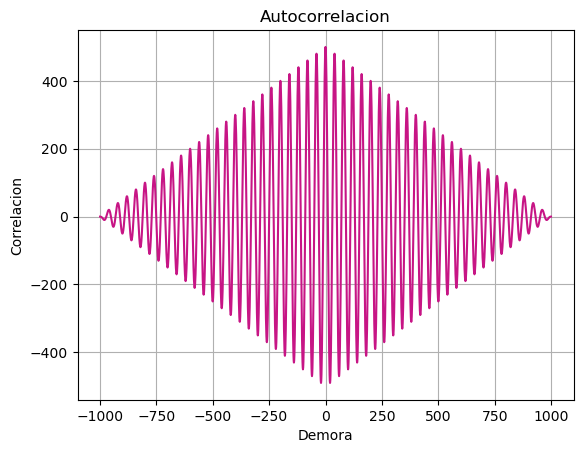

In [31]:
#-----------------CORRELACION-----------------#

def correlacion(x1, x2, mode="full"):

    demora = sig.correlation_lags(len(x1), len(x2), mode=mode) #Calculo los desplazamientos correspondientes a cada valor que devuelve wl correlate
    # osea indico cuanto se desplazo la señal "x1" respecto a "x2".
    C = sig.correlate(x1, x2, mode=mode) #Devuelvo un vector de valores de correlacion para cada posible desplazamiento
    #La correlacion mide que tan parecidas son las señales cuando una se desplaza respecto a la otra
    
    return demora, C


demora, C = correlacion(xx, xx) 
plt.figure(5)
plt.plot(demora, C, color='mediumvioletred')
plt.title("Autocorrelacion")
plt.xlabel("Demora")
plt.ylabel("Correlacion")
plt.grid(True)

El gráfico muestra un máximo cuando hay cero demora, lo cual tiene mucho sentido porque esto significaría que la señal coincide con si misma cuando no hay desplazamiento. A medidia que la demora aumenta o disminuye, la correlacion oscila simétricamente respecto al cero, mostrando la periodicidad de la senoidal. Si en mi gráfico yo cambio la demora por el tiempo, vería siplemente una senoidal con mayor amplitud.

**Correlación con la senoidal amplificada y desfasada**

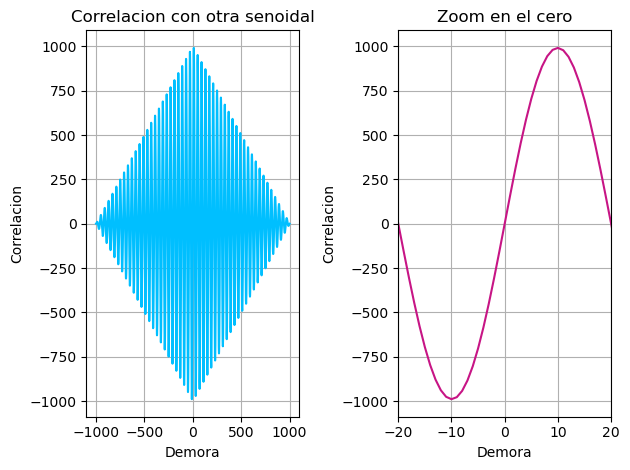

In [34]:
demora1, C1 = correlacion(xx, xx1) 
plt.subplot(1, 2, 1)
plt.plot(demora1, C1, color='deepskyblue')
plt.title("Correlacion con otra senoidal")
plt.xlabel("Demora")
plt.ylabel("Correlacion")
plt.grid(True)

demora1, C1 = correlacion(xx, xx1) 
plt.subplot(1, 2, 2)
plt.plot(demora1, C1, color='mediumvioletred')
plt.title("Zoom en el cero")
plt.xlabel("Demora")
plt.ylabel("Correlacion")
plt.xlim(-20, 20)
plt.grid(True)

plt.tight_layout()
plt.show()

El máximo de correlación esta cerca de la demora cero, pero mi desfase de $\frac{\pi}{2}$ hace que se reduzca la altura del pico, por lo que entiendo que mi desfase me disminuye la coincidencia ínstantanea. Aún se puede se puede ver la periodicidad de la correlación.

**Correlación con la señal modulada**

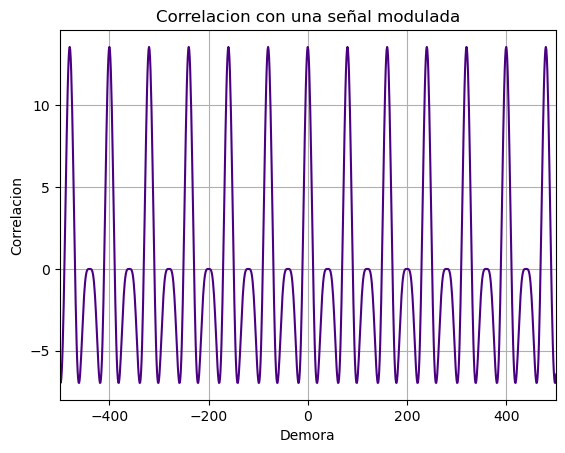

In [36]:
demora2, C2 = correlacion(xx, modulada) 
plt.plot(demora2, C2, color='indigo')
plt.title("Correlacion con una señal modulada")
plt.xlabel("Demora")
plt.ylabel("Correlacion")
plt.xlim(-500, 500)
plt.grid(True)

La correlación no alcanza un valor muy alto porque la señal moduladora altera bastante la amplitud de la modulada respecto a la portadora (osea, con la que estamos correlacionando). Como la señal modulada contiene dos frecuencias diferentes, mi coincidencia no es tan regular y parecida a una senoidal con envolvente. Mi combinacion de frecuencias me genera una interferencia constructiva y destructiva a diferentes demoras que produce ese patron raro pero oscilante.

**Correlación con la señal recortada**

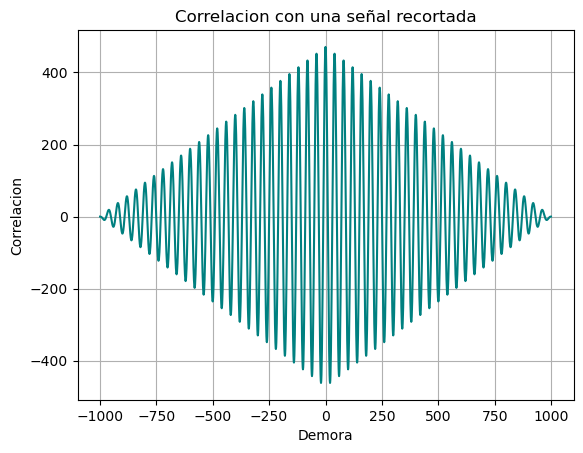

In [37]:
demora3, C3 = correlacion(xx, senoidalRecortada) 
plt.plot(demora3, C3, color='teal')
plt.title("Correlacion con una señal recortada")
plt.xlabel("Demora")
plt.ylabel("Correlacion")
plt.grid(True)

El recorte realizado en la señal original me trae no linealidades (es decir, no preserva la proporción directa entre la entrada y salida ya que no es más una senoidal perfecta) porque se cortan partes de la amplitud de mi señal con la que correlaciono. Al ser una señal no tan diferente, tambien noto un gráfico parecido al de las dos primeras correlaciones que expliqué.

**Correlación con la señal cuadrada**

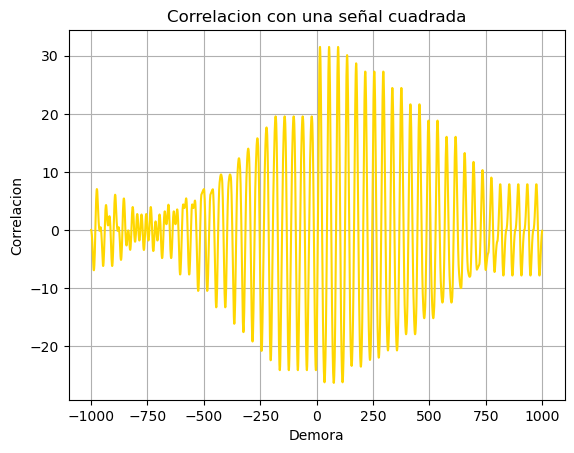

In [38]:
demora4, C4 = correlacion(xx, señalCuadrada) 
plt.plot(demora4, C4, color='gold')
plt.title("Correlacion con una señal cuadrada")
plt.xlabel("Demora")
plt.ylabel("Correlacion")
plt.grid(True)

La señal cuadrada no solo tiene una frecuencia distinta, sino que tambien contiene muchos armónicos impares, por lo que mi correlacion muestra valeres bastante bajos, demostrando así que mis dos señales no se parecen para nada entre sí. Mi mayor amplitud está cerca del cero que es donde las señales están un poco mas alineadas en fase, y al rededor de los -750 de demora es donde está la menor correlación entre las dos señales.

**Correlación con el pulso rectangular**

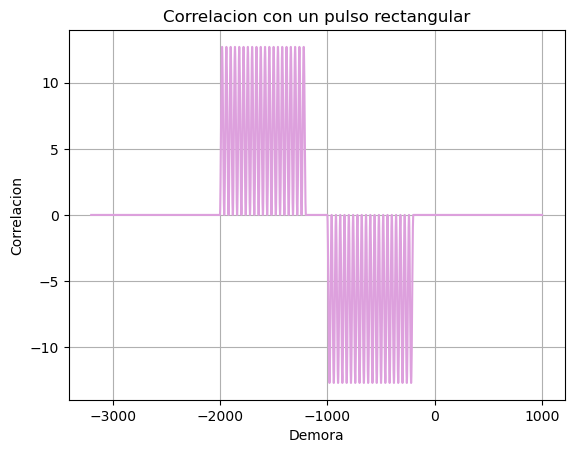

In [39]:
demora5, C5 = correlacion(xx, pulso) 
plt.plot(demora5, C5, color='plum')
plt.title("Correlacion con un pulso rectangular")
plt.xlabel("Demora")
plt.ylabel("Correlacion")
plt.grid(True)

Se puede observar que la correlacion muestra picos constantes solamente en la alineación del pulso con la senoidal y valores nulos en el resto (ya que la senoidal se estaría multiplicando por cero en esos puntos). En la parte positiva de mi correlación el pulso coincide con la parte positiva de mi senoidal por lo qu eel producto interno es positivo y en la parte negativa de mi correlación el puslo coincide con la parte negativa de mi senoidal por lo que el producto interno es negativo. Esto me demuestra que la senoidal solo coincide con el pulso en las fracciones de tiempo donde este existe ya que mi pulso actua como una ventana temporal que agarra solo un pedazo de la senoidal para calcular la correlación.

### 4) Demostración de propiedad tigonométrica:

Debo demostrar la igualdad
$$2.sen(\alpha).sen(\beta)=cos(\alpha-\beta)-cos(\alpha+\beta)$$

Recuerdo la propiedad: ´$$cos(\alpha-\beta)=cos(\alpha).cos(\beta) + sen(\alpha)sen(\beta)$$
$$cos(\alpha+\beta)=cos(\alpha).cos(\beta) - sen(\alpha)sen(\beta)$$


Entonces:
$$cos(\alpha-\beta)-cos(\alpha+\beta)=\cancel{cos(\alpha).cos(\beta)} + sen(\alpha)sen(\beta) \cancel{- cos(\alpha).cos(\beta)} + sen(\alpha)sen(\beta)$$
$$cos(\alpha-\beta)-cos(\alpha+\beta)=2.sen(\alpha).sen(\beta) \checkmark$$


## Bonus

- Bajar un wav de freesounD.org, graficarlo y calcular la energía
  Utilicé el audio del link: https://freesound.org/people/aceinet/sounds/425579/

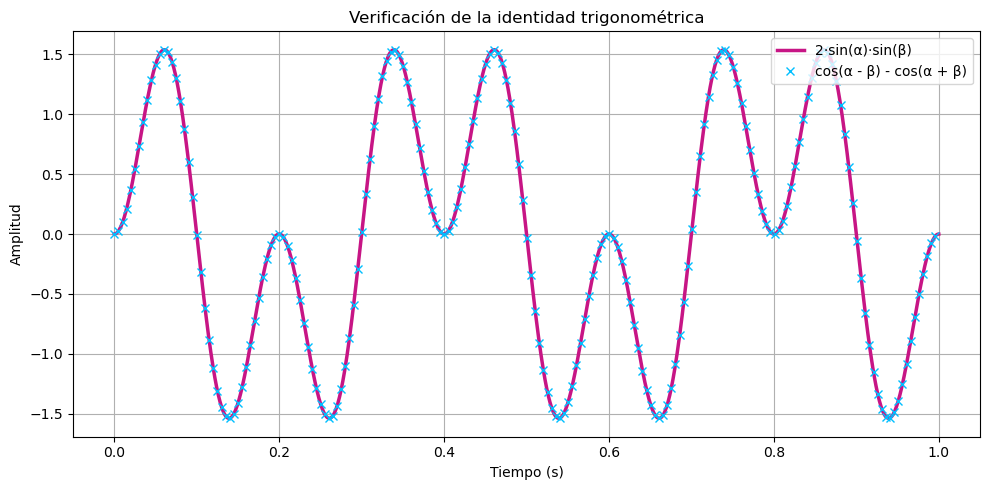

In [58]:
import numpy as np
import matplotlib.pyplot as plt

f = 5 
omega = 2 * np.pi * f
t = np.linspace(0, 1, 1000) 
alpha = omega * t
beta = (omega / 2) * t 

a= 2 * np.sin(alpha) * np.sin(beta)
b= np.cos(alpha - beta) - np.cos(alpha + beta)

plt.figure(figsize=(10, 5))
plt.plot(t, a, label='2·sin(α)·sin(β)', color='mediumvioletred',linewidth=2.5)
plt.plot(t, b, label='cos(α - β) - cos(α + β)', marker='x', linestyle='None',markevery=5, color='deepskyblue',)
plt.title('Verificación de la identidad trigonométrica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Bonus:

C:\Users\Nahiu\AppData\Local\Temp\ipykernel_15384\3664915006.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read("coolGuitarra.wav")



Frecuencia de muestreo: 44100 Hz

Energia canal izquierdo: 253843711104920.0

Energia canal derecho: 253843711104920.0


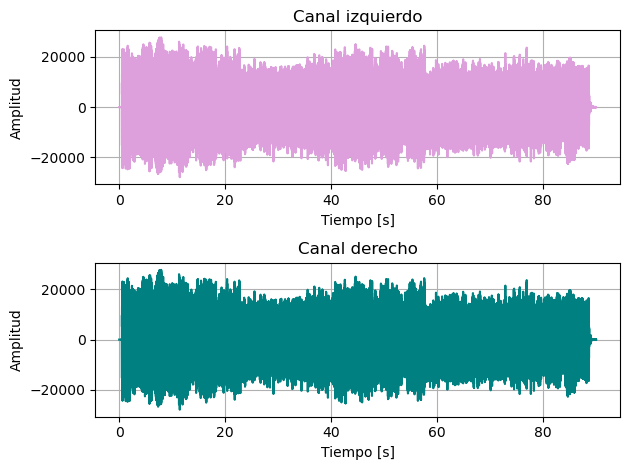

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

fs, data = wavfile.read("coolGuitarra.wav") 

print("\nFrecuencia de muestreo:", fs, "Hz")
    
t = np.arange(len(data)) / fs #armo mi eje del tiempo para poder graficar

energiaIzq = np.sum(data[:, 0].astype(float)**2)
energiaDer = np.sum(data[:, 1].astype(float)**2)
#data[] agarra todas las filas de la columna 0 (osea canal izquierdo)
#astype(float) pasa de entero a float para evitar los problemas que salen cuandoelevo al cuadrado
#**2 eleva al cuadrado cada muestra
# np.sum() suma todos los valores al cuadrado

print("\nEnergia canal izquierdo:", energiaIzq)
print("\nEnergia canal derecho:", energiaDer)


#Yo ya se de antemano que mi sonido esta en dos canales (stereo) porque me lo avisaba la pagina de donde descargue dicho sonido
#Hago dos graficos superpuestos para poder ver ambos
plt.figure(1)

plt.subplot(2, 1, 1)
plt.plot(t, data[:, 0], color='plum')#data[] me elije la columna
#son dos columnas porque son dos channels
plt.title("Canal izquierdo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(t, data[:, 1], color='teal')
plt.title("Canal derecho")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()

Al ver el gráfico de los dos canales stereo del audio, se observa que ambos canales presentan comportamientos casi idénticos, por lo que con estudiar uno solo me basta (es muy probable que sea un audio mono duplicado a stereo). Respecto al cálculo de energía, dado que los datos del archivo se encuentran en valores enteros relativos, por eso los resultados numéricos de energía no tienen de una unidad física definida. Para poder entender mejor esta medida, procedí a normalizar la señal:
$$x_{norm}[n] = \frac{x[n]}{x_{max}}$$ Siendo $x_{max}$ el valor máximo absoluto de la señal.

In [63]:
#--------------------NORMALIZO--------------------#
data_float = data.astype(float) #convierto a float para evitar overflow y luego normalizo
max_val = np.max(np.abs(data_float))  #calculo el valor máximo absoluto de toda la señal
data_norm = data_float / max_val      #normalizo a [-1, 1]
energiaDer_norm = np.sum(data_norm[:, 1]**2)
print("Energía del audio:", energiaDer_norm)

Energía del audio: 326948.60257754766


Este valor sirve como medida relativa de la intensidad de la señal dentro del audio digital. Cuando no estaba normalizada la señal, el valor dependía del formato de cuantización (grabación) del archivo, me sirve pura y exclusivamente para comparar energias en un mismo archivo de audio. Al normalizar la señal, mi energía también es adimensional pero no depende del formato de grabación por lo que puedo usar el valor obtenido para comparar la señal con otras señales diferentes.

## Conclusiones:

El trabajo me permitió entender cómo distintas transformaciones y tipos de señales afectan su energía o potencia, su grado de ortogonalidad y la forma de sus correlaciones. Las senoidales mostraron un comportamiento bastante predecible, con ortogonalidad clara cuando se desfasaron en π/2. Las señales moduladas y recortadas pudieron interpretarse como el producto de la senoidal base con ventanas o envolventes, lo que modificó la correlación y limitó la coincidencia en el tiempo. En el caso de las señales no senoidales, como la cuadrada y el pulso hubo lugar a correlaciones más complejas, con múltiples picos o patrones acotados. De esta manera, se entendió que la correlación es una herramienta fundamental para medir la similitud entre señales y mostrar de manera tanto visual como matemática las relaciones que existen entre ellas.
Con el ejercicio bonus logre entender que la amplitud de una señal digital es siempre relativa, por esto la energía no tienenuna unidad física absoluta, sino que es un valor dependiente de la representación digital. Por lo que la energía de una señal (más si es normalizada) debe interpretarse como una medida comparativa del contenido de una señal.

## Autoevaluación del Aprendizaje:

Resolví la tarea, pero tengo dudas.

- ¿Qué aprendiste al hacer esta tarea? --> 
  Logré entender mejor la correlacion y ortogonalidad ya que antes de realizar el trabajo no habia lograr entender los conceptos. Por la parte de las herramientas utilizadas, aprendí muchas cosas nuevas en python y jupyter.
- ¿Qué te quedó claro? ¿Qué te sigue costando? --> 
Me quedó en claro como amplificar, desfasar y modular señales, además logre entender bien como funciona la correlacion y su relacion con la ortogonalidad. Lo que me sigue costando es poder ver como una señal es ortogonal a otra y otra cosa que me cuesta un poco es como resolver las series a mano, como por ejemplo para la potencia promedio, para poder resolverlas requerí de la ayuda de python, pero cuando las muetsras son muchas no logro darme cuenta como resolverlo ya que no creo que sumar toooodas las muetsras sea la forma correcta.

- Uso de la IA: --> 
Se utilizó bastante para poder entender como usar LaTex y Python ya que tenía 0 conocimientos al respecto. Más que nada se utilizo para saber como hacer series y funciones partidas en LaTex (no se entendia bien en google). También se utilizo para hacer el producto interno y más que nada para graficar ya que tuve muchos problemas de que no se veian los gráficos o las cosas estaban superpuestas, etc. Se utilizo también para el bonus porque si bien ya sabia que habia una biblioteca que me podia ayudar, no lograba encontrar los nombres de las funcines que tenia que usar y también me ayudo con unos problemas que tuve al ser el sonido una onda de doble channel. Y por último, la use para reescribir mi conclusión ya que sentía que la forma en la que la había escrito sonaba poco técnica y formal, como dicen "en criollo".